# Worksheet 10

Name:  Hao Qi  
UID:  U96305250  

### Topics

- Singular Value Decomposition

#### Feature Extraction

SVD finds features that are orthogonal. The Singular Values correspond to the importance of the feature or how much variance in the data it captures. See the note [here](https://medium.com/@gallettilance/singular-value-decomposition-787c08b8931b). 

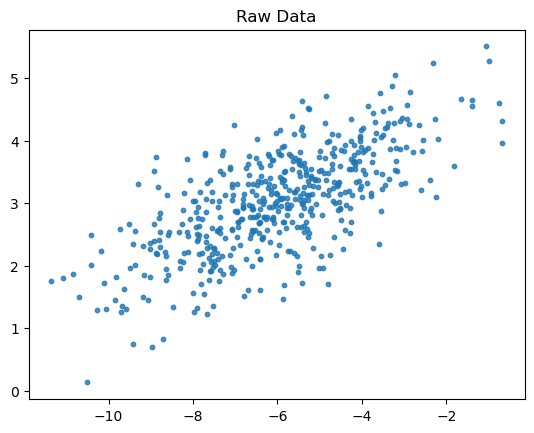

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

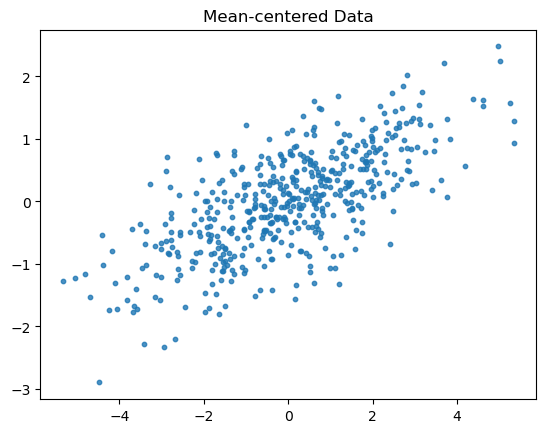

In [2]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

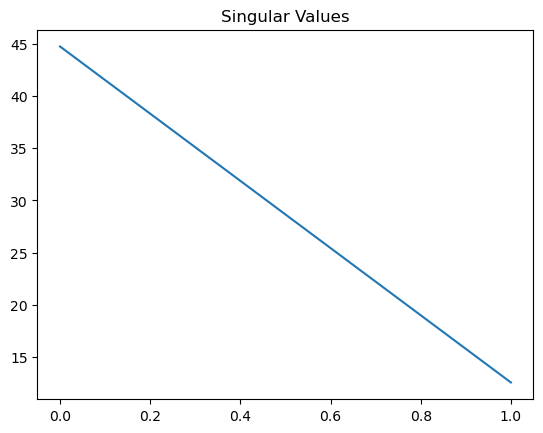

In [3]:
u, s, vt = np.linalg.svd(X, full_matrices=False)
plt.plot(s) # only 2 singular values
plt.title("Singular Values")
plt.show()

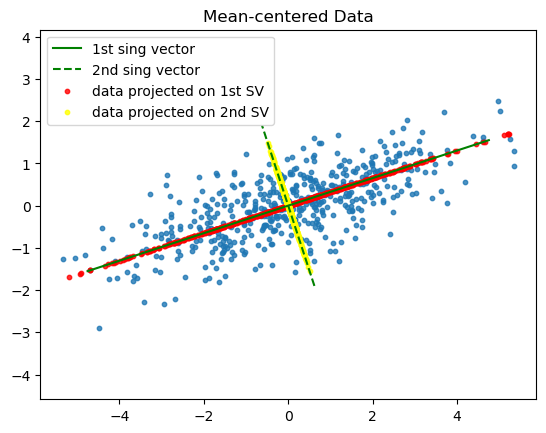

In [4]:
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()

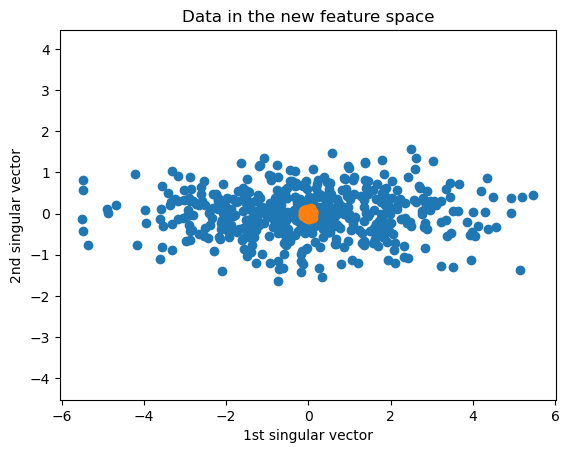

In [5]:
# show the output from svd in the same way
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("Data in the new feature space")
plt.show()

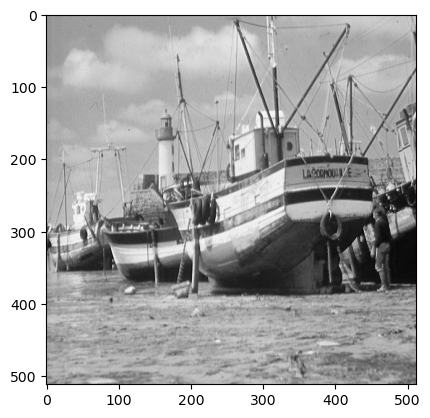

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap=cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

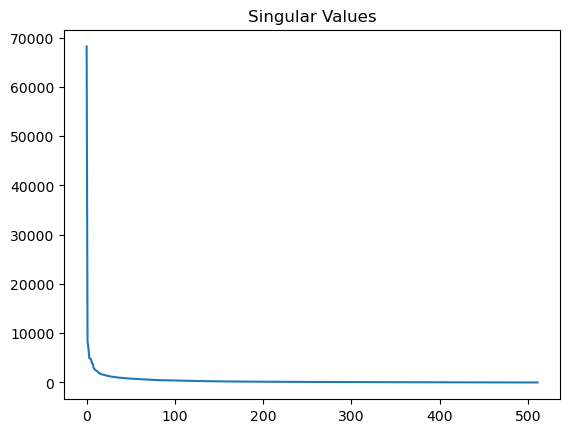

In [8]:
u, s, vt = np.linalg.svd(boat, full_matrices=False)

plt.plot(s) 
plt.title("Singular Values")
plt.show()

Notice you can get the image back by multiplying the matrices back together:

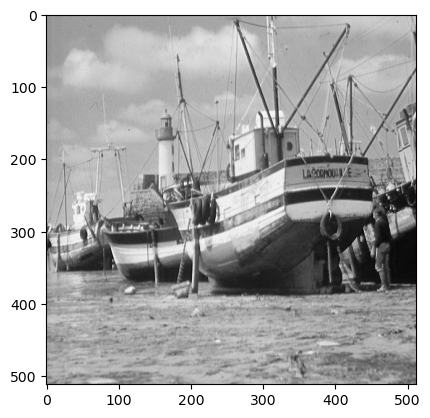

In [9]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap=cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [12]:
# scopy = s.copy()
# scopy[1:] = 0.0

scopy = np.concatenate(([s[0]], np.zeros(len(s)-1)))

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

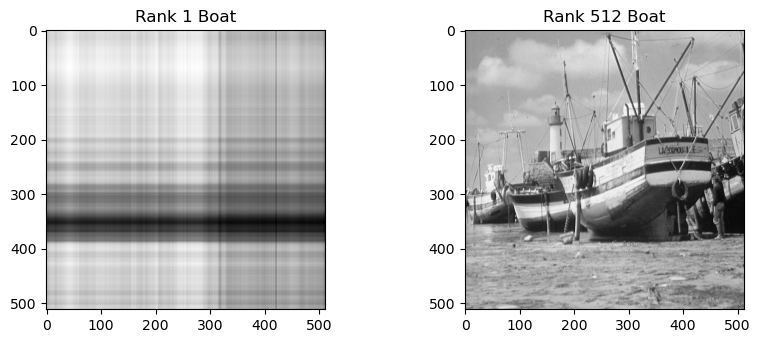

In [13]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap=cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap=cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

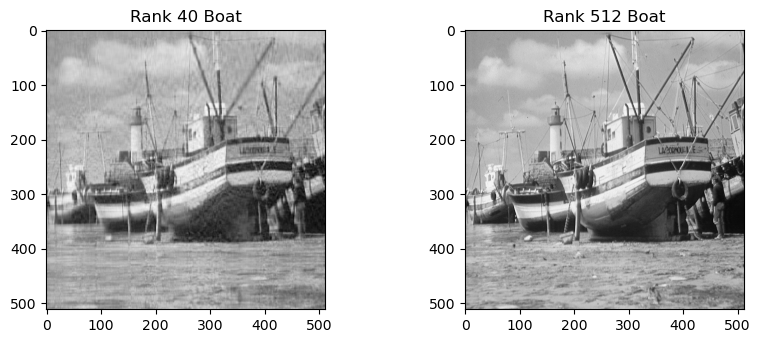

In [14]:
scopy = np.hstack((s[:40], np.zeros_like(s[40:])))

boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap=cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap=cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

### Why you should care

a) By using an approximation of the data, you can improve the performance of classification tasks since:

1. there is less noise interfering with the classification
2. there is no relationship between features after SVD
3. the algorithm is sped up when reducing the dimension of the dataset

Below is some code to perform facial recognition on a dataset. Notice that, applied blindly, it does not perform well:

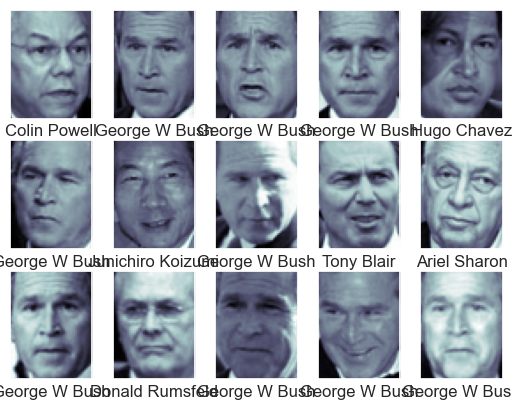

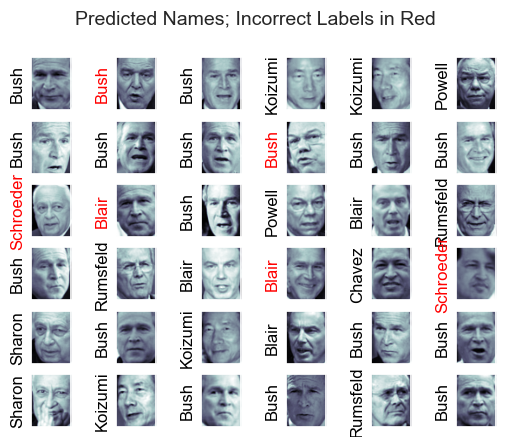

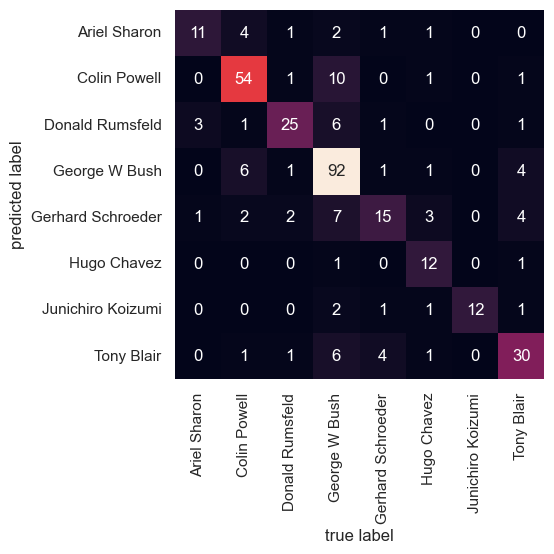

Accuracy =  0.744807121661721


In [15]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train/test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# blindly fit svm
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# fit model
model = svc.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

By performing SVD before applying the classification tool, we can reduce the dimension of the dataset.

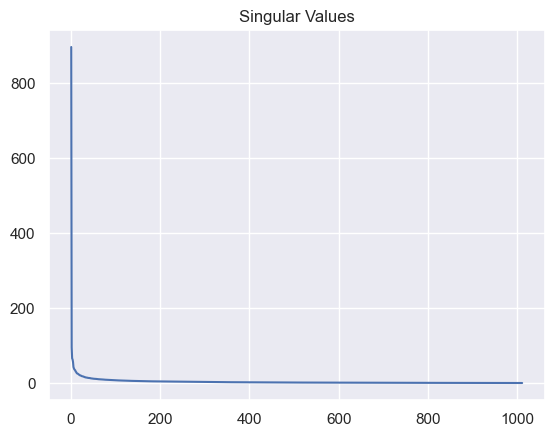

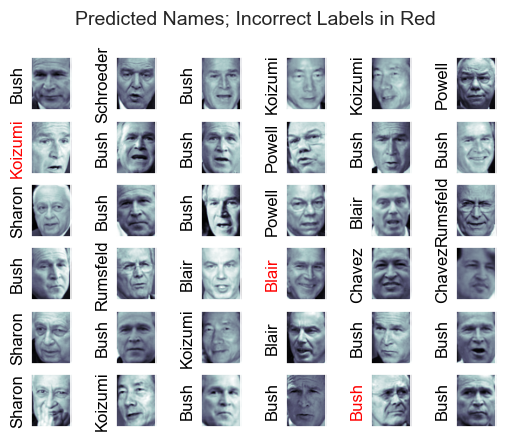

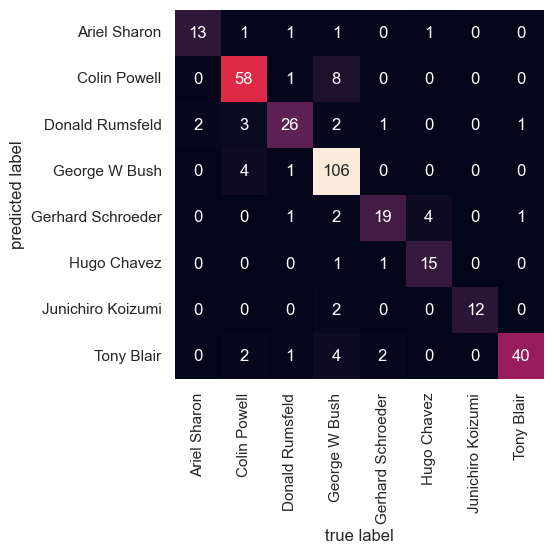

Accuracy =  0.857566765578635


In [22]:
# look at singular values
_, s, _ = np.linalg.svd(Xtrain, full_matrices=False)
plt.plot(range(1, len(s)+1), s)
plt.title("Singular Values")
plt.show()

# extract principal components
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svcpca = make_pipeline(pca, svc)
model = svcpca.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

Similar to finding k in K-means, we're trying to find the point of diminishing returns when picking the number of singular vectors (also called principal components).  

In the task above, n_components=150 was found through a manual search.  

b) SVD can be used for anomaly detection.

The data below consists of the number of 'Likes' during a six-month period for each of the 9000 users across the 210 content categories that Facebook assigns to pages. 

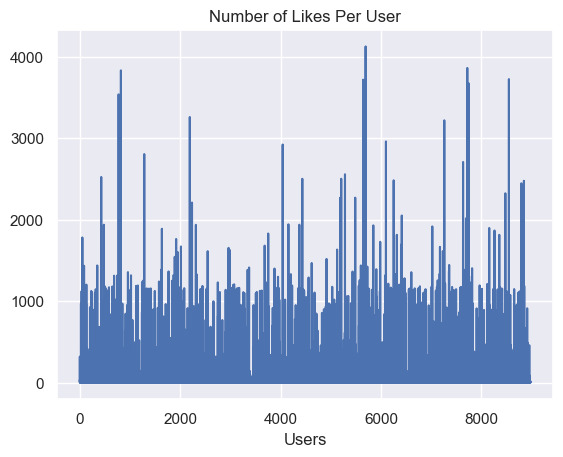

In [25]:
data = np.loadtxt('spatial_data.txt')

FBSpatial = data[:, 1:]
FBSnorm = np.linalg.norm(FBSpatial, axis=1, ord=1)
plt.plot(FBSnorm)
plt.title('Number of Likes Per User')
_ = plt.xlabel('Users')
plt.show()

How users distribute likes across categories follows a general pattern that most users follow. This behavior can be captured using a few singular vectors. And anomalous users can be easily identified.

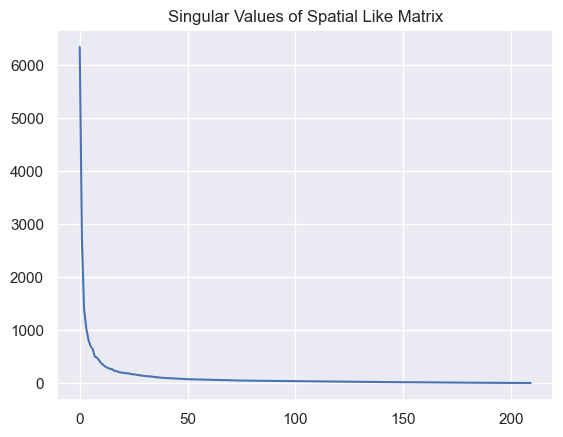

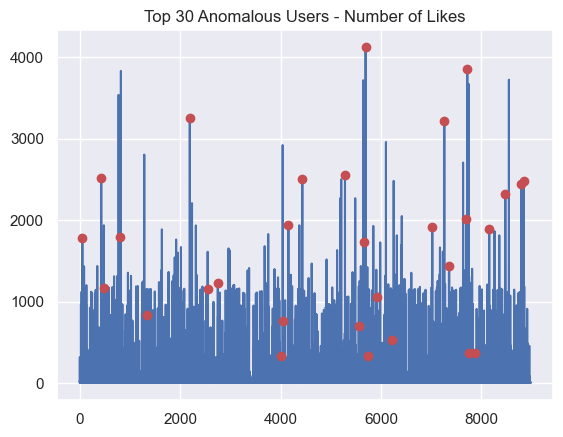

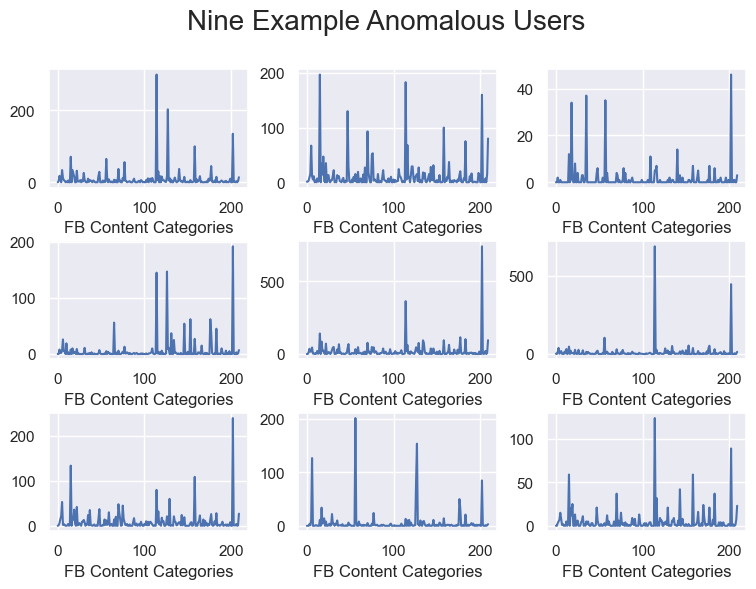

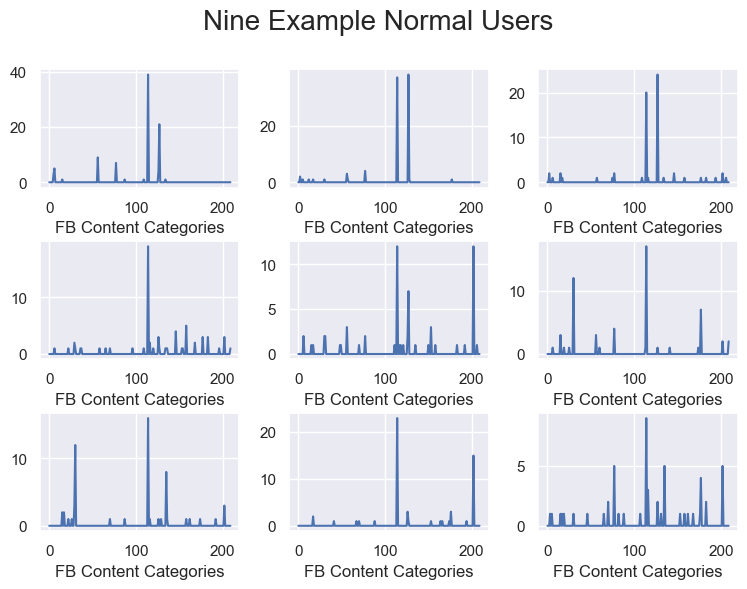

In [27]:
u, s, vt = np.linalg.svd(FBSpatial, full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

RANK = 30
scopy = s.copy()
scopy[RANK:] = 0.
N = u @ np.diag(scopy) @ vt
O = FBSpatial - N
Onorm = np.linalg.norm(O, axis=1)
anomSet = np.argsort(Onorm)[-30:]
# plt.plot(Onorm)
# plt.plot(anomSet, Onorm[anomSet],'ro')
# _ = plt.title('Norm of Residual (rows of O)')
# plt.show()

plt.plot(FBSnorm)
plt.plot(anomSet, FBSnorm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Users - Number of Likes')
plt.show()

# anomalous users
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[anomSet[i-1],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
_ = plt.suptitle('Nine Example Anomalous Users', size=20)
plt.show()

set = np.argsort(Onorm)[0:7000]
# normal users that have high overall volume
max = np.argsort(FBSnorm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[set[max[i-1]],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
_ = plt.suptitle('Nine Example Normal Users', size=20)
plt.show()

## Challenge Problem

a) Fetch the "mnist_784" data. Pick an image of a digit at random and plot it.

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

In [31]:
print(X.shape, y.shape)

(70000, 784) (70000,)


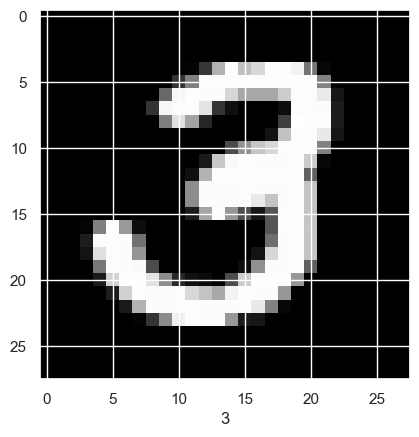

In [33]:
idx = np.random.randint(0, len(X))

image = X[idx].reshape(28, 28)
plt.imshow(image, cmap="gray")
plt.xlabel(y[idx])
plt.show()

b) Plot its singular value plot.

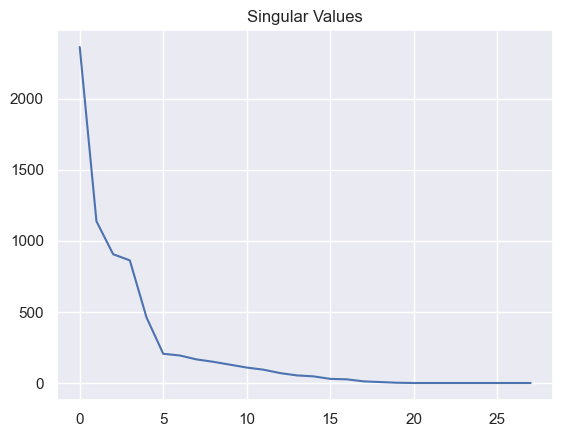

In [36]:
u, s, vt = np.linalg.svd(image, full_matrices=False)

plt.plot(s) 
plt.title("Singular Values")
plt.show()

c) By setting some singular values to 0, plot the approximation of the image next to the original image. 

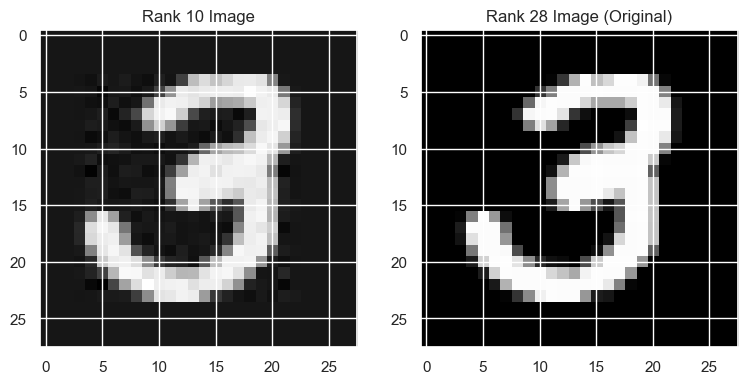

In [41]:
scopy = s.copy()
scopy[10:] = 0.0
image_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(image_app, cmap='gray')
plt.title('Rank 10 Image')
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.title('Rank 28 Image (Original)')
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so that you may take a small random sample for this and the following questions. 

In [42]:
from sklearn.model_selection import train_test_split

# take a small random sample, e.g., 5% of the data
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=42)

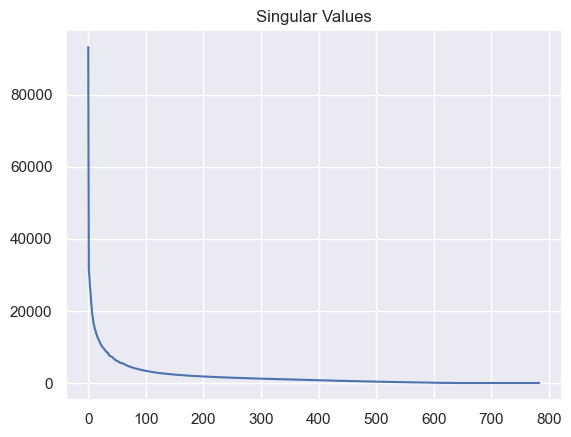

In [43]:
u, s, vt = np.linalg.svd(X_sample, full_matrices=False)

plt.plot(s) 
plt.title("Singular Values")
plt.show()

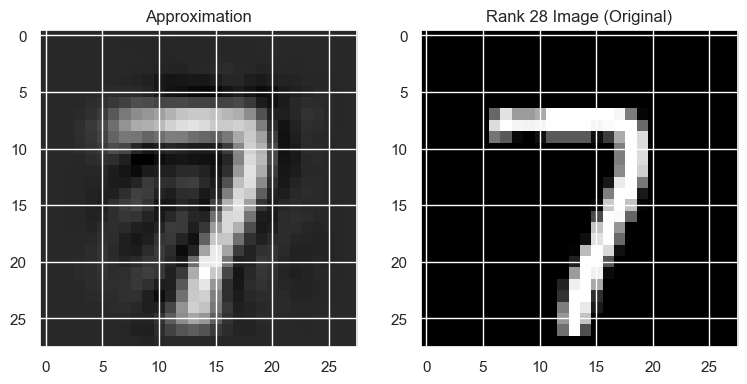

In [46]:
scopy = np.copy(s)
scopy[50:] = 0.0

X_sample_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(X_sample_app[30].reshape(28,28), cmap='gray')
plt.title('Approximation')
plt.subplot(1,2,2)
plt.imshow(X_sample[30].reshape(28,28), cmap='gray')
plt.title('Rank 28 Image (Original)')
plt.show()

The choice of the rank (k) depends on the desired level of variance retention within the dataset and considerations regarding computational efficiency. After observing the singular value plot, I would choose k=50 because the point at k=50 in the graph is an elbow point, where the singular values do not significantly decrease thereafter, indicating that more eigenvalues will not bring us particularly much information and so are not worthwhile considering the cost of space and time. Of course, we can also determine the optimal k value by comparing the residual errors obtained with different k values.  

e) Using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images.

In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', n_init='auto')
kmeans.fit_predict(X_sample_app)

array([8, 3, 1, ..., 6, 5, 2], dtype=int32)

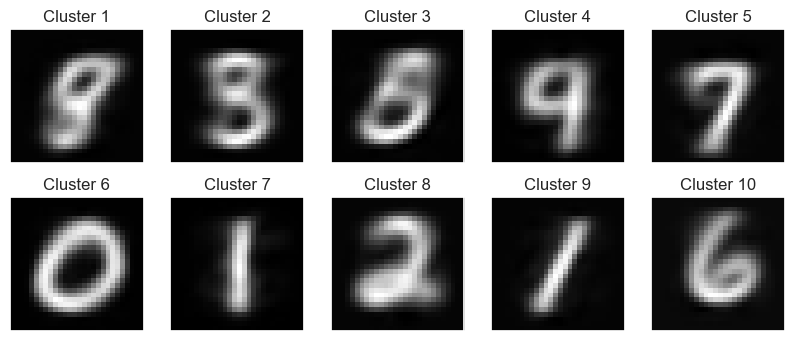

In [87]:
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
cnt = 0
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[], title=f'Cluster {cnt+1}')
    cnt += 1
    axi.imshow(center, cmap='gray')
plt.show()

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that one). Comment on any differences (or lack thereof) you observe between the centroids created here and the ones you created in e).

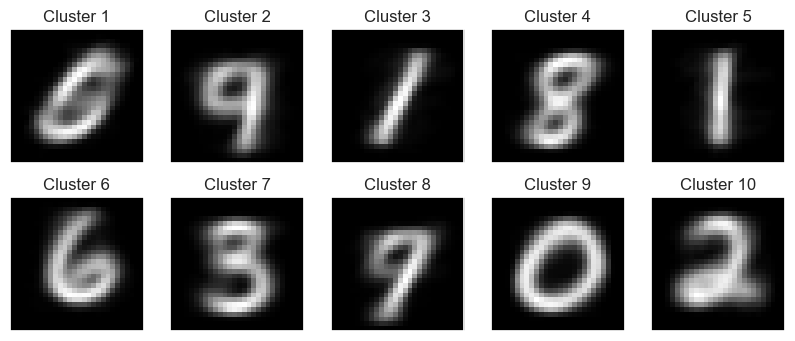

In [91]:
kmeans_origin = KMeans(n_clusters=10, init='k-means++', n_init='auto')
kmeans_origin.fit_predict(X_sample)

centers = kmeans_origin.cluster_centers_.reshape(10, 28, 28)
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
cnt = 0
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[], title=f'Cluster {cnt+1}')
    cnt += 1
    axi.imshow(center, cmap='gray')
plt.show()

Overall, the difference in centroids between the original dataset and the dataset after SVD is insignificant, especially for digits with precise classification shapes (such as 0 and 6). However, the centroids of complex digits (such as 8) generated from the original images appear clearer and easier to recognize, indicating that the SVD operation has indeed lost some information.  

K-means might not be the ideal method for implementing this handwritten digit recognition task because the classification of some easily confused digits (such as 7 and 9) does not seem so satisfying.

g) Create a matrix (let's call it `O`) that is the difference between the original dataset and the rank-10 approximation of the dataset, i.e., if the original dataset is `A` and the rank-10 approximation is `B`, then `O = A - B`. 

In [94]:
u, s, vt = np.linalg.svd(X_sample, full_matrices=False)
scopy = np.copy(s)
scopy[10:] = 0.0
B = u.dot(np.diag(scopy)).dot(vt)
A = X_sample
print(A.shape, B.shape)
O = A - B
print(O.shape)

(3500, 784) (3500, 784)
(3500, 784)


h) The largest (using Euclidean distance from the origin) rows of the matrix `O` could be considered anomalous data points. Briefly explain why. Plot the 10 images (by finding them in the original dataset) responsible for the 10 largest rows of that matrix `O`.

(3500,)


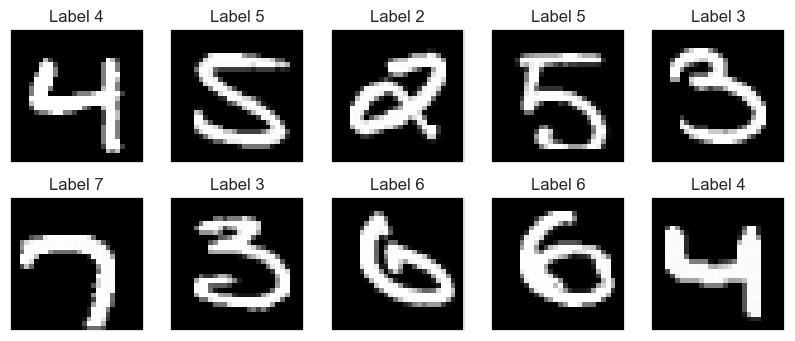

In [107]:
diff = np.linalg.norm(O, axis=1)
print(diff.shape)
indices = np.argsort(diff)[-10:]    # ascending
images = A[indices]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.set(xticks=[], yticks=[], title=f'Label {y_sample[indices[i]]}')
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
plt.show()

This approach leverages the intuition that anomalies in the dataset are those the principal components identified by SVD cannot efficiently approximate.  Rows with the largest distances in `O` signify data points that deviate significantly from the overall pattern in the data, suggesting their anomalous nature. 